В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. $ \textbf{Обратите внимание} $: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?
_________________________________________________________________________________________________________________________

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm
%matplotlib inline

### 1

Выбранное распределение - бета распределение. На вход такое распределение получает положительные параметры $ \alpha $ и $ \beta $.

Ссылка: https://ru.wikipedia.org/wiki/Бета-распределение

In [2]:
# параметры 
alp = 2
bet = 3.5

Text(0, 0.5, 'Density')

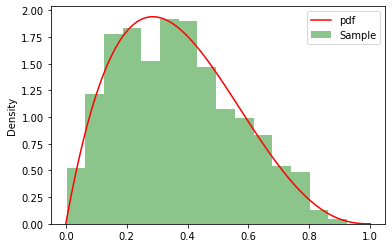

In [3]:
# гистограмма выборки
plt.hist(beta.rvs(alp, bet, size = 1000), bins = 15, density=True, histtype='stepfilled', alpha = 0.45, color = 'g', label = 'Sample')

# теоретическая функция плотности
z = np.linspace(0., 1., 100)
plt.plot(z, beta.pdf(z, alp, bet), color='r', label = 'pdf')

plt.legend()
plt.ylabel('Density')

### 2

Математическое ожидание и дисперсия случайной величины ${\displaystyle X}$, имеющей бета-распределение, имеют вид:

$$
\begin{aligned}
EX = \frac{\alpha}{\alpha + \beta}, \\
DX = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}.
\end{aligned}
$$

В scipy.stats.norm распределение задается через $ \mu $ и $ \sigma $. $ \sigma = \sqrt{\frac{DX}{n}} $, где $ n $ - размер выборки.


In [4]:
mu, dx = alp / (alp + bet), alp * bet / (alp + bet) ** 2 * (alp + bet + 1)

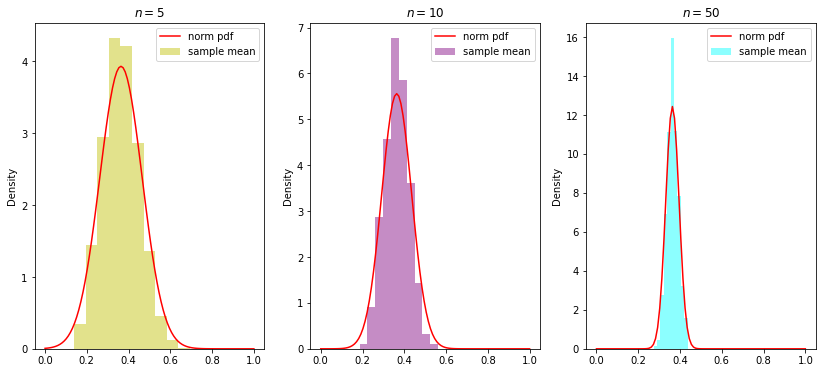

In [5]:
fig, axes = plt.subplots(1, 3, figsize = (14, 6))
for ax, n, clr in zip(axes, [5, 10, 50], ['y', 'purple', 'aqua']):
    sample_mean_values = [np.mean(beta.rvs(alp, bet, size = n)) for _ in range(1000)]
    counts, bins = np.histogram(sample_mean_values)
    ax.hist(bins[:-1], bins, density=True, histtype='stepfilled', alpha = 0.45, color = clr, weights=counts/counts.max(), label = 'sample mean')
    ax.plot(z, norm.pdf(z, mu, np.sqrt(dx / n)), color = 'r', label='norm pdf')
    ax.legend()
    ax.set_ylabel('Density')
    ax.set_title(r'$n = ' + str(n) + '$')

### 3

Как видно из графиков, при увеличении размера выборки гистограмма начинает всё больше напоминать нормальное распределение. С ростом $ n $ увеличивается аппроксимация бета-распределения нормальным.